# Aim

Figure out what's going wrong with fitting vibration peaks in the Keck data.

In [1]:
from utils import *
from observer import *
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
# first, import the Keck data

pol = get_keck_tts()[2][:,0]

In [3]:
freqs = np.linspace(0, f_sampling//2, pol.size//2 + 1)

In [4]:
psd = get_psd(pol)
ind = np.argmax(freqs > f_w)
assert ind != 0, "didn't find a high enough frequency"
avg_measurement_power = np.mean(psd[ind:])
measurement_noise_recovered = np.sqrt(f_sampling * avg_measurement_power)

In [5]:
measurement_noise_recovered

0.08051088650354668

In [6]:
i = 0
window = 4000
vibe_fit_freq(pol[i * window:(i + 1) * window])

(array([[2.08000000e+02, 3.40226137e-04],
        [7.40000000e+01, 9.80837555e-04],
        [1.97000000e+02, 3.97717723e-04],
        [1.09000000e+02, 8.29157460e-04],
        [2.39000000e+02, 3.96518544e-04],
        [5.70000000e+01, 2.09792376e-03],
        [1.45000000e+02, 8.89508377e-04],
        [1.21000000e+02, 1.06292848e-03],
        [2.91000000e+02, 4.51823499e-04],
        [2.60000000e+01, 5.07802382e-03]]),
 array([0.01971197, 0.00423268, 0.01491588, 0.01219292, 0.00476204,
        0.00588233, 0.01108083, 0.00475274, 0.01352529, 0.00436157]))

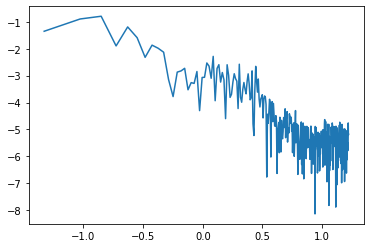

In [46]:
# linear log-log space interpolation

i1 = 1
i2 = np.argmin(np.abs(freqs - f_1))
log_freqs = np.log10(freqs[i1:i2])
log_psd = np.log10(psd[i1:i2])
plt.plot(log_freqs, log_psd)

In [47]:
slope, intercept, _, _, _ = stats.linregress(log_freqs, log_psd)

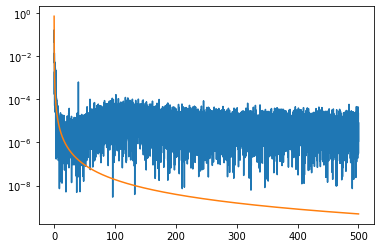

In [51]:
plt.semilogy(freqs[1:], psd[1:])
plt.semilogy(freqs[1:], 10 ** intercept * freqs[1:] ** slope)